In [43]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [8]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [25]:
len(digits.data)

1797

In [27]:
digits.data[0:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [37]:
len(digits.data)

1797

In [42]:
digits.feature_names[:5],len(digits.feature_names)

(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4'], 64)

In [33]:
dir(digits.frame)[:5]

['__bool__', '__class__', '__delattr__', '__dir__', '__doc__']

In [35]:
digits.images[:1]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]])

In [36]:
len(digits.images)

1797

In [38]:
len(digits.target)

1797

In [40]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [39]:
len(digits['target'])

1797

In [41]:
digits.target_names[:5]

array([0, 1, 2, 3, 4])

#### So we have all these things in our data set

#### We can use data, images ,target(or target_name) fetures as they have equal lenth of data and which is uswful for predicting number

#### let we check hand written numbers

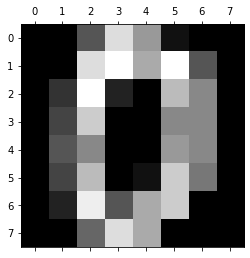

In [45]:
plt.matshow(digits.images[0])

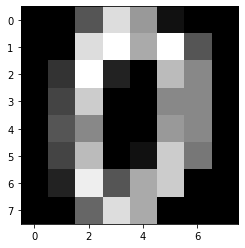

In [46]:
plt.imshow(digits.images[0])

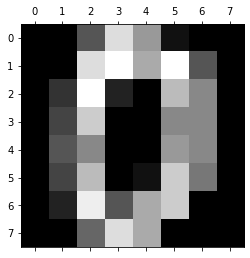

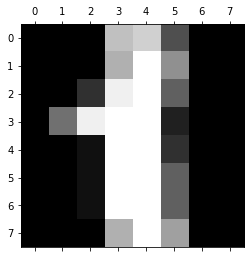

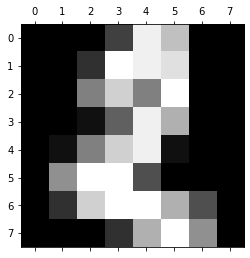

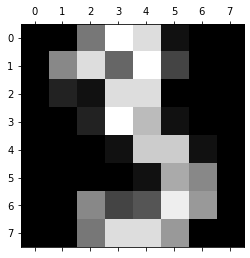

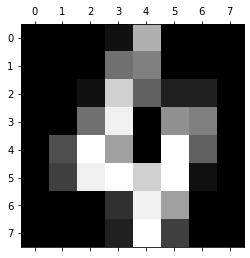

In [48]:
for i in range(5):
    plt.matshow(digits.images[i])

In [49]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [50]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,train_size=0.8)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [59]:
model.fit(X_train,y_train)

C:\Users\Rupali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
model.score(X_test,y_test)*100

96.94444444444444

In [62]:
model.score(X_train,y_train)*100

100.0

In [63]:
model.predict([digits.data[50]])

array([2])

#### let we check our answer

In [64]:
digits.target[50]

2

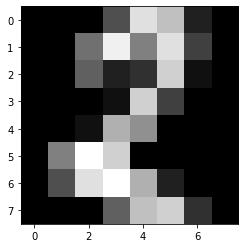

In [65]:
plt.imshow(digits.images[50])

In [67]:
y_pred = model.predict(X_test)

#### We can say that it show good result

### Let we check where our model is accurate and where it fail by confusion matrix 

In [66]:
from sklearn.metrics import confusion_matrix

In [71]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 35,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

#### for better understanding we will plot this confusion matrix using heatmap

In [69]:
import seaborn as sn

Text(69.0, 0.5, 'Original')

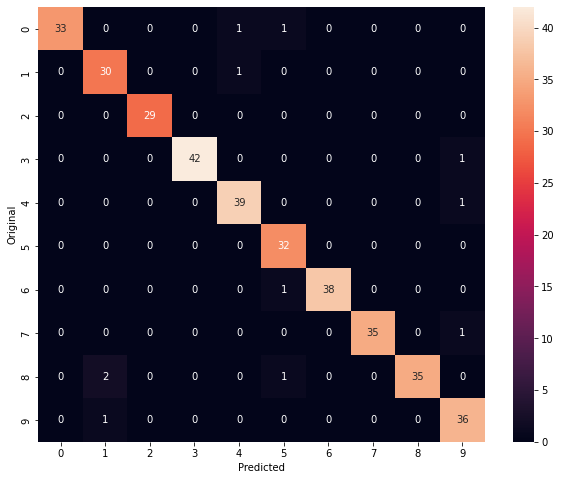

In [80]:
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Original')

#### From this we can understand , for all diagonal result quantity original and preidcted result are same 
#### for some result like original is 8 and model predict 1 gor 2 times
### In this way we can check our model accuracy using confusion matrics and we presented it with heatmap